In [43]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import confusion_matrix

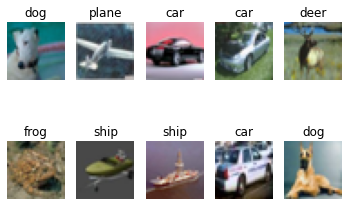

In [44]:
from keras.datasets import cifar10
from random import seed
from random import randint
seed(3)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(2):
    for j in range(5):
        a=randint(0,5000)
        if i==0:
            b=j+i+1
        if i==1:
            b=j+i+5
        plt.subplot(2, 5,b)
        plt.imshow(x_train[a].astype('uint8'))
        plt.axis('off')
        plt.title(classes[y_train[a][0]])
plt.show()

In [45]:
np.shape(y_train)

(50000, 1)

In [46]:
#imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
x_train_grey=0.2989 * x_train[:,:,:,0] + 0.5870 * x_train[:,:,:,1] + 0.1140 * x_train[:,:,:,2]
x_test_grey=0.2989 * x_test[:,:,:,0] + 0.5870 * x_test[:,:,:,1] + 0.1140 * x_test[:,:,:,2]

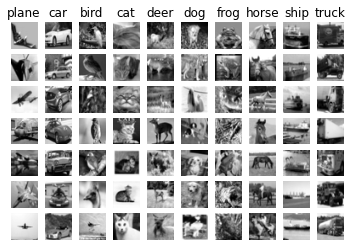

In [47]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train_grey[idx].astype('uint8'),cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)

In [216]:
x_train_pp  = x_train_grey/255
x_test_pp  = x_test_grey/255

In [217]:
X_train = x_train_pp.reshape(x_train_pp.shape[0], 32*32)
X_test = x_test_pp.reshape(x_test_pp.shape[0], 32*32)

In [289]:
np.shape(X_train)
act_fun=["relu","tanh","sigmoid","softmax"]
n=0
epoch=10
layer=[500,300]

In [290]:
model = Sequential()
model.add(Flatten(input_shape=[1024]))
model.add(Dense(layer[0],activation=act_fun[n]))
model.add(Dense(layer[1], activation=act_fun[n]))
# model.add(Dense(layer[2], activation=act_fun[n]))
# model.add(Dense(layer[3], activation=act_fun[n]))
# model.add(Dense(layer[4], activation=act_fun[n]))
model.add(Dense(10, activation="softmax"))

In [291]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])
import  time
startingPoint=time.time()
trainlog=model.fit(X_train, y_train, epochs=epoch, batch_size=32, validation_split=0.15)

Epoch 1/10
1329/1329 [==============================] - 11s 8ms/step - loss: 2.0723 - accuracy: 0.2532 - val_loss: 2.0444 - val_accuracy: 0.2360
Epoch 2/10
1329/1329 [==============================] - 10s 7ms/step - loss: 1.9450 - accuracy: 0.3120 - val_loss: 1.9876 - val_accuracy: 0.2560
Epoch 3/10
1329/1329 [==============================] - 10s 7ms/step - loss: 1.8800 - accuracy: 0.3358 - val_loss: 1.8862 - val_accuracy: 0.3275
Epoch 4/10
1329/1329 [==============================] - 10s 7ms/step - loss: 1.8303 - accuracy: 0.3540 - val_loss: 1.8967 - val_accuracy: 0.3228
Epoch 5/10
1329/1329 [==============================] - 10s 8ms/step - loss: 1.7931 - accuracy: 0.3677 - val_loss: 1.8028 - val_accuracy: 0.3607
Epoch 6/10
1329/1329 [==============================] - 10s 7ms/step - loss: 1.7604 - accuracy: 0.3814 - val_loss: 1.7946 - val_accuracy: 0.3581
Epoch 7/10
1329/1329 [==============================] - 10s 8ms/step - loss: 1.7287 - accuracy: 0.3922 - val_loss: 1.8358 - val_ac

In [292]:
total=time.time()-startingPoint
print('runtime=',total,'seconds')

runtime= 100.66636347770691 seconds


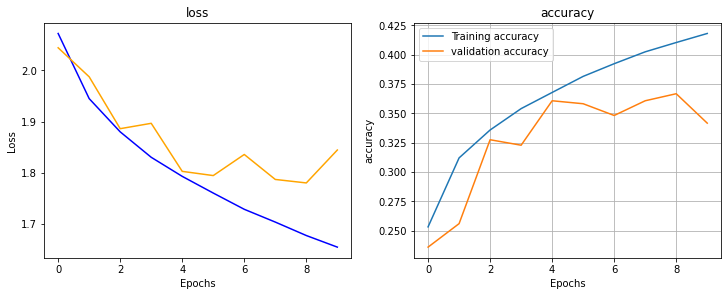

In [293]:
loss_train = trainlog.history['loss']
loss_val = trainlog.history['val_loss']
accu_train = trainlog.history['accuracy']
accu_val = trainlog.history['val_accuracy']
epochs=range(10)
f,ax=plt.subplots(1,2,figsize=(10,4),constrained_layout=True)
ax[0].plot(epochs, loss_train,color='blue', label='Training loss')
ax[0].plot(epochs, loss_val,color='orange', label='validation loss')
ax[0].set(title='loss',xlabel='Epochs',ylabel='Loss')
ax[1].plot(epochs, accu_train, label='Training accuracy')
ax[1].plot(epochs, accu_val, label='validation accuracy')
ax[1].set(title='accuracy',xlabel='Epochs',ylabel='accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [294]:
y_predict=model.predict(X_test)
y_pred=np.zeros((10000,1))
for i in range(10000):
    cls=max(y_predict[i,:])
    for j in range(10):
        if y_predict[i,j]==cls:
            y_pred[i]=j

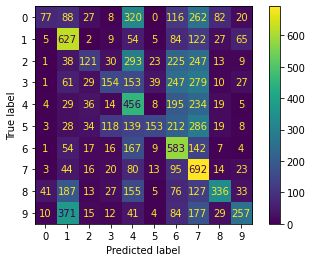

In [295]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [296]:
from sklearn.metrics import recall_score, f1_score, precision_score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
model.evaluate(X_test,y_test)

Recall: 0.345600
F1 score: 0.316999
Precision: 0.428969
313/313 [==============================] - 2s 5ms/step - loss: 1.8426 - accuracy: 0.3456


[1.8425923585891724, 0.3456000089645386]